# Skrip Program Simulasi
```python
import random as r


class MontyHall:
    def __init__(self, doors=3, prizes=1, limit=2):
        self.doors = [x for x in range(doors)]

        self.prizes = []
        while len(self.prizes) < prizes:
            tmp = self.pick_door()
            if tmp not in self.prizes:
                self.prizes.append(tmp)

        self.limit = limit

    def pick_door(self):
        return r.choice(self.doors)

    def select_door(self):
        self.select = self.pick_door()

    def remove_doors(self):
        while(len(self.doors) > self.limit):
            rmv = self.pick_door()
            tmp = [x for x in self.doors]
            tmp.remove(rmv)
            if(rmv != self.select and any(x in tmp for x in self.prizes)):
                self.doors.remove(rmv)

    def switch_door(self):
        old = self.select
        while(old == self.select):
            self.select = self.pick_door()

    def check_win(self):
        return self.select in self.prizes

    def print_verbose(self, key, value):
        v_format = "{:33s} : {}"
        print(v_format.format(key, value))

    def start(self, switch=False, verbose=False):
        self.select_door()

        if verbose:
            self.print_verbose("Doors", self.doors)
            self.print_verbose("Prizes", self.prizes)
            self.print_verbose("Contestant's Selection", self.select)

        self.remove_doors()

        if verbose:
            self.print_verbose("Remaining Doors", self.doors)

        if(switch):
            self.switch_door()
            if verbose:
                self.print_verbose(
                    "Contestant's Switched Selection", self.select)

        if verbose:
            print()

        return self.check_win()


class Simulation:
    def __init__(self, doors=3, trials=10**5, prizes=1, limit=2):
        err1 = "Number of doors must be greater than number of prizes"
        assert doors > prizes, err1

        err2 = "The minimal number of limits is equal to the number of prizes"
        err3 = " and less than number of doors"
        assert limit >= prizes and limit < doors, err2+err3

        self.doors = doors
        self.trials = trials
        self.prizes = prizes
        self.limit = limit

    def start(self, switch=False, verbose=False, info=True):
        wins = 0
        for x in range(self.trials):
            m = MontyHall(self.doors, self.prizes, self.limit)
            if(m.start(switch, verbose)):
                wins += 1
        return self._print(switch, wins, info)

    def _print(self, switch, wins, info=True):
        out_format = " {:15s}: {:3.2f}℅ with {} wins of {} trials"

        ss = "Switching" if(switch) else "Not Switching"
        perc = wins * 100. / self.trials
        out = out_format.format(ss, perc, wins, self.trials)
        line = "="*(len(out)+1)
        return "\n".join([line, out, line, "\n"]) if info else perc


if __name__ == "__main__":
    number_of_trials = 10000
    number_of_doors = 3
    number_of_prizes = 1
    number_of_limits = 2  # Doors will be removed until there are only {} doors remaining
    is_verbose = False

    # s = Simulation()  # default arguments value
    s = Simulation(doors=number_of_doors, trials=number_of_trials,
                   prizes=number_of_prizes, limit=number_of_limits)
    print(s.start(switch=True, verbose=is_verbose))
    print(s.start(switch=False, verbose=is_verbose))

```

In [1]:
from Simulasi import Simulation
import matplotlib.pyplot as plt

In [2]:
number_of_trials = 5
number_of_doors = 3
number_of_prizes = 1
number_of_limits = 2
is_verbose = False

s = Simulation(doors=number_of_doors, trials=number_of_trials,
               prizes=number_of_prizes, limit=number_of_limits)
print(s.start(switch=True, verbose=is_verbose))
print(s.start(switch=False, verbose=is_verbose))

 Switching      : 40.00℅ with 2 wins of 5 trials


 Not Switching  : 60.00℅ with 3 wins of 5 trials




In [3]:
def generate():
    s = Simulation(trials=number_of_trials)
    for x in range(1000):
        switch_list.append(s.start(switch=True, info=False))
        not_switch_list.append(s.start(switch=False, info=False))

def show():
    plt.ylim(0,100)
    plt.xlim(0,1000)

    plt.plot([x+1 for x in range(len(switch_list))],switch_list, label="Switching", color="purple")
    plt.plot([x+1 for x in range(len(not_switch_list))],not_switch_list, label="Not Switching", color="orange")

    avg_switch = sum(switch_list)/len(switch_list)
    avg_not_switch = sum(not_switch_list)/len(not_switch_list)

    print("{:45s}: {:.2f}%".format("Average Switching's Winning percentage", avg_switch))
    print("{:45s}: {:.2f}%".format("Average Not Switching's Winning percentage",avg_not_switch))

    plt.axhline(color="yellow", y=avg_switch, label="Switching's average")
    plt.axhline(color="blue", y=avg_not_switch, label="Not Switching's average")

    plt.ylabel('Winning percentage (%)')
    plt.xlabel('Number of simulations')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Average Switching's Winning percentage       : 66.92%
Average Not Switching's Winning percentage   : 33.29%


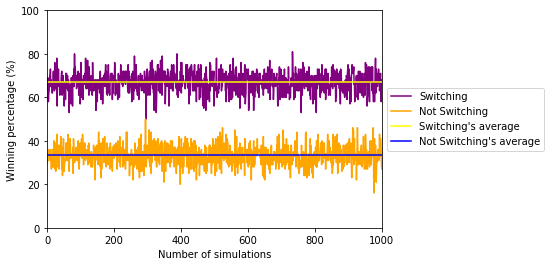

In [4]:
switch_list = []
not_switch_list = []
number_of_trials = 100

generate()
show()

Average Switching's Winning percentage       : 66.63%
Average Not Switching's Winning percentage   : 33.33%


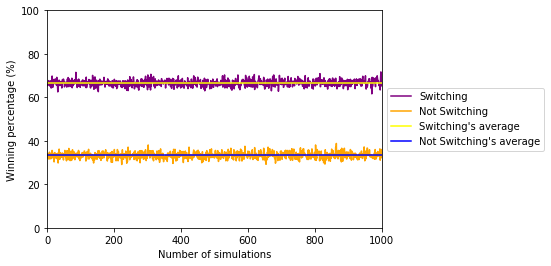

In [8]:
switch_list = []
not_switch_list = []
number_of_trials = 1000

generate()
show()